In [ ]:
from __future__ import print_function

import pandas as pd, numpy as np, matplotlib.pyplot as plt, pylab as py
%pylab inline
from tqdm import tqdm
import math

import warnings
warnings.filterwarnings('ignore')

from movement import utils
import movement.config as CONFIG


In [52]:
features = ['LOC_X','LOC_Y','ACTION_TYPE','SHOT_MADE_FLAG','SHOT_DISTANCE','PLAYER_ID','PLAYER_NAME',
            'SHOT_TYPE','SHOT_ZONE_AREA','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','TEAM_NAME','TEAM_ID',
            'EVENTTIME','GAME_EVENT_ID','GAME_DATE','HTM','VTM','GAME_ID']
main_features = ['shot_rho','shot_angle','reb_rho','reb_angle','reb_height','reb_time','x','y']

In [53]:
def load_shots():
    """
    Formatting column types
    """
    shots = pd.read_csv('%s/%s' % (CONFIG.data.shots.dir, 'shots.csv'))
    shots.loc[:, 'EVENTTIME'] = utils.convert_time(minutes=shots.loc[:, 'MINUTES_REMAINING'].values, seconds = shots.loc[:, 'SECONDS_REMAINING'].values)
    shots['GAME_ID'] = '00' + shots['GAME_ID'].astype(int).astype(str)
    shots = shots[features]
    return shots


def sg_filter(x, m, k=0):
    """
    x = Vector of sample times
    m = Order of the smoothing polynomial
    k = Which derivative
    """
    mid = int(len(x) / 2)
    a = x - x[mid]
    expa = lambda x: list(map(lambda i: i**x, a))
    A = np.r_[list(map(expa, range(0,m+1)))].transpose()
    Ai = np.linalg.pinv(A)

    return Ai[k]


def smooth(x, y, size=5, order=2, deriv=0):

    if deriv > order:
        raise Exception("deriv must be <= order")

    n = len(x)
    m = size

    result = np.zeros(n)

    for i in range(m, n-m):
        start, end = i - m, i + m + 1
        f = sg_filter(x[start:end], order, deriv)
        result[i] = np.dot(f, y[start:end])

    if deriv == 1 :
        result *= -1
    if deriv > 1:
        result *= math.factorial(deriv)

    return result

def plot(t, plots, shot_ind):
    n = len(plots)

    for i in range(0,n):
        label, data = plots[i]

        plt = py.subplot(n, 1, i+1)
        plt.tick_params(labelsize=8)
        py.grid()
        py.xlim([t[0], t[-1]])
        py.ylabel(label)

        py.plot(t, data, 'k-')
        py.scatter(t[shot_ind], data[shot_ind], marker='*', c='g')

    py.xlabel("Time")
    py.show()
    py.close()

def create_figure(order, shot_time):

    fig = py.figure(figsize=(8,6))
    nth = 'th'
    if order < 4:
        nth = ['st','nd','rd','th'][order-1]

    title = "Shot Time: %s" % (shot_time)

    fig.text(.5, .92, title, horizontalalignment='center')



















  0%|                                                                                          | 0/588 [00:00<?, ?it/s]

595.03 20 34 [ -0.          -0.          -0.27939583  -0.90772917  -1.849625
  -4.91689583  -6.0624375   -8.26238117  -6.80077356 -11.61916652
 -12.26285252  -7.35066667 -12.62927083  -8.17897917  -2.2239375
  -6.5601875   -9.14879167 -10.51539583 -10.84645833 -11.93345833
 -11.19922917 -10.1819375  -15.36633333 -15.0275      -8.65777083
  -7.7203125  -11.7865     -11.59554167  -2.64652083  -3.023125
  -6.97716667 -23.81202083 -25.0993125   -3.09135417   0.86429167
   1.25204167   8.18795833  16.76075      6.9911875   -1.09264583
   2.03640946   1.82060877  -0.75942972   1.24596708  -5.28233333
   2.90464583  11.20320833  -0.          -0.        ]
shot_rho       252.52
shot_angle      43.56
reb_rho          52.7
reb_angle        69.1
reb_height    13.0326
reb_time       594.18
x            -180.148
y             159.025
Name: 4870, dtype: object


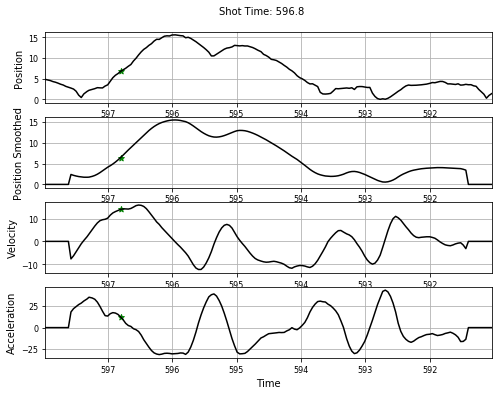

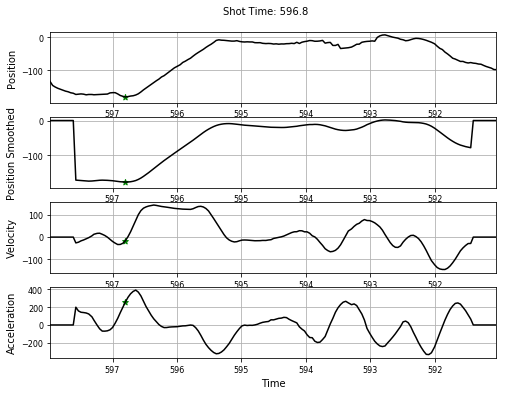

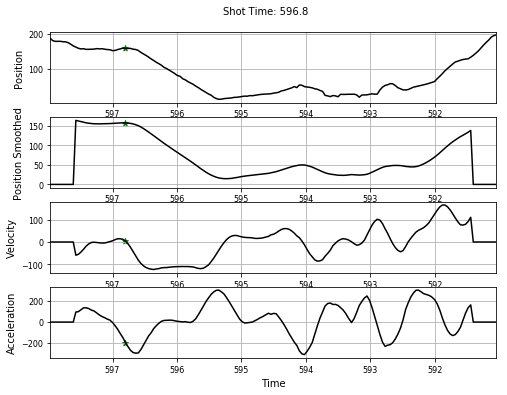

260.24 14 7 [ -0.          -0.          -5.87604167  -8.34239583  -3.02422917
  -7.54114583  -0.6201832    6.59733617   2.08176275  -0.48146848
  -4.02660417   2.30958333 -31.111375   -27.32910417   1.20021447
  -7.45761774 -10.8379911   -9.28067885  -2.99910417   4.88225
 -15.4389375  -49.20520833 -43.31345833  -8.22359027   4.34091062
  -6.31473381 -12.23662845  -7.04739583   6.0290625   -1.51254167
  -4.00875      4.06120833   0.39523222  -2.64924055  -0.78966118
   1.3530448   13.52639583   1.25741667  -6.9131875   13.023125
   7.63935417  -1.0556875   -1.01693604  -3.42692487  -4.22590075
  -7.33469826  21.19614583  -0.          -0.        ]
shot_rho       256.33
shot_angle      39.78
reb_rho         38.03
reb_angle       83.06
reb_height    11.1464
reb_time       259.92
x            -196.428
y              125.64
Name: 28024, dtype: object


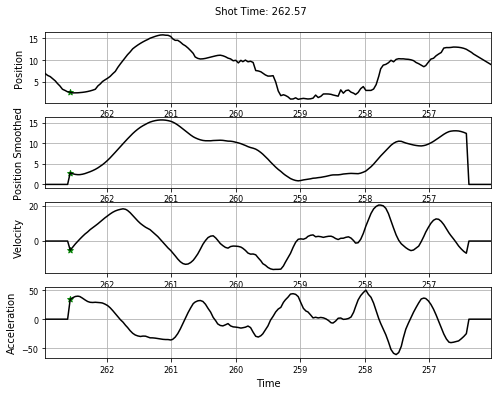

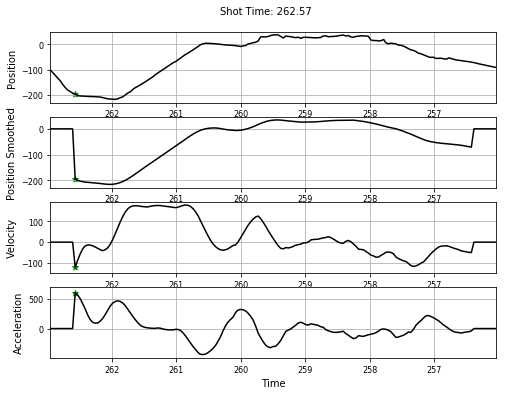

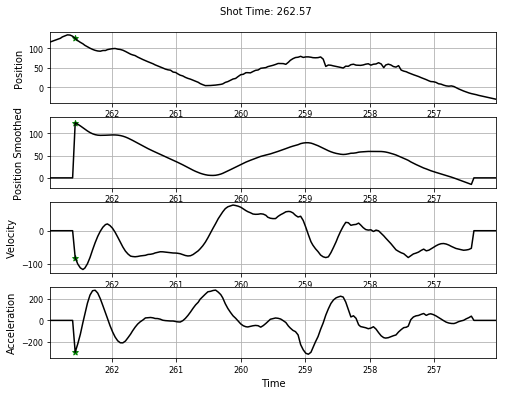

213.44 9 6 [ -0.          -0.          -3.83901012  -3.17594116  -2.16292451
  -1.77657382   1.230625   -12.400875   -26.5316875  -23.62129167
 -30.66808333 -32.48570833 -22.58958333 -15.68720833 -10.03983333
  -5.64747917  -2.50995833  -2.2523125    9.96764583  19.2934375
  13.50889583   8.88427083  10.4380023   10.88842677   8.76375723
   7.08773107   3.77010417   3.47702083   2.73247917   1.90485417
   1.17689583  -1.36077083  -2.01920833   0.2484375   -2.25929167
  -8.75808333  -6.13197917  -3.49939583 -10.93460943  -8.27395288
  -3.16151915  -4.36164872  -3.78554167  -3.2975625   -2.81364583
  -2.33416667  -1.8589375   -0.          -0.        ]
shot_rho       246.02
shot_angle      52.43
reb_rho           3.2
reb_angle      261.33
reb_height    10.2959
reb_time       213.15
x            -143.812
y             197.106
Name: 28025, dtype: object


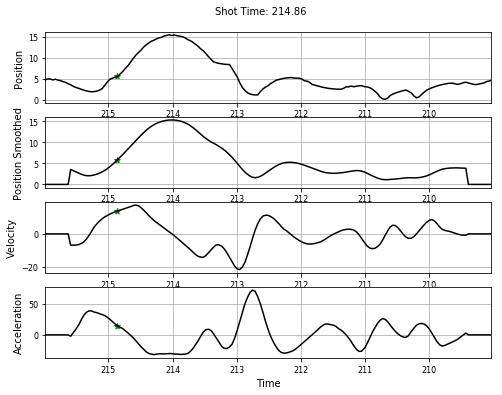

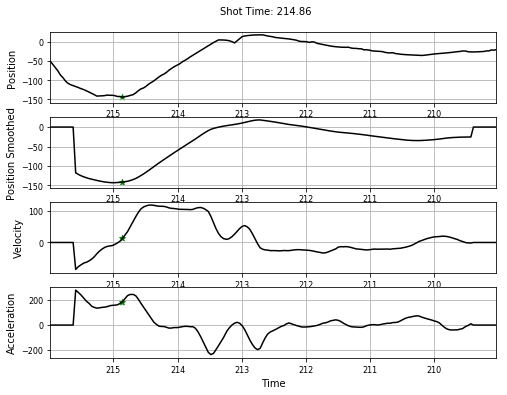

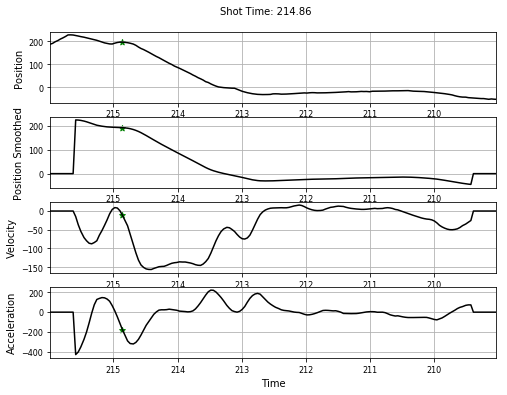

145.32 31 5 [ -0.          -0.          -8.81341667 -15.56977083  -9.4381875
   4.63299988   4.47728234  -0.1093153    0.27123374   2.94370833
  -0.39060417  -2.45045833  -5.392125    -6.39304167  -6.40358333
 -10.80270833 -11.17620833  -1.6064375    5.02719228   4.17420668
   0.96026176   0.02930056   0.29689583   3.28175     -3.07902083
  -7.88210417  -1.96022917   0.47789583  -6.81433333 -12.25827083
  -7.15314977  -8.81880643 -10.2117687  -12.72141661 -15.33410417
 -15.53941667 -16.55372917 -14.5006875  -18.07060417 -19.58920833
 -21.58802083 -22.56070833  -1.57239583  19.84705264  14.18404591
   9.01482502  15.11810154  -0.          -0.        ]
shot_rho        250.6
shot_angle      52.95
reb_rho         34.39
reb_angle      122.47
reb_height    12.4639
reb_time       145.08
x            -150.871
y             194.343
Name: 28026, dtype: object


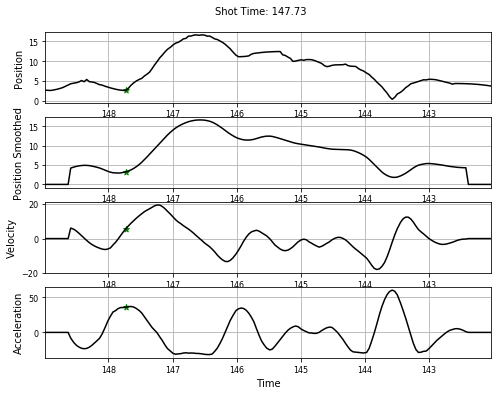

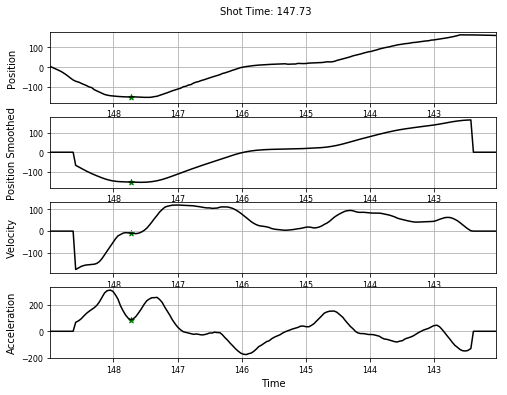

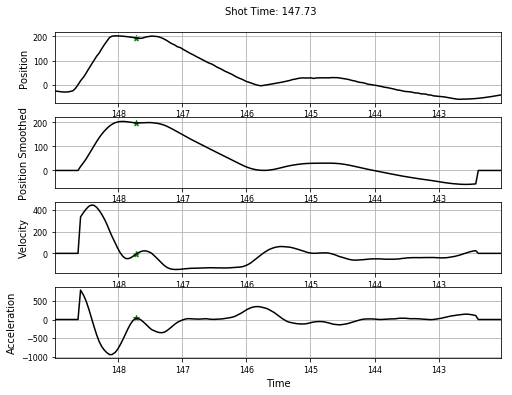

117.5 4 24 [ -0.          -0.         -14.6025625  -10.7484375   -9.154875
  -5.049125    -6.58914583 -10.49991667 -10.1094375  -10.18529167
 -10.57391667  -8.98791667  -5.65152083  -1.0831875   -2.317375
  -0.6645625   -4.40585417  -7.19433333  -2.84425     -7.29902083
 -20.47522917 -24.82545833 -13.87477083  -8.64058333   5.81704167
  21.2829375   15.53935417   7.34564583   6.45602083   5.06885417
   3.9856875    3.25045833   2.4143125    2.27920833   2.80847917
   2.55089583  -3.11083333  -3.5335625    0.95052083   3.297
   3.6551875    0.9804375    5.79391667  10.77054167   5.15827083
   2.82285417   8.33964583  -0.          -0.        ]
shot_rho       228.27
shot_angle     177.24
reb_rho         17.84
reb_angle       12.75
reb_height    10.0481
reb_time        117.3
x             155.578
y              4.9615
Name: 28027, dtype: object


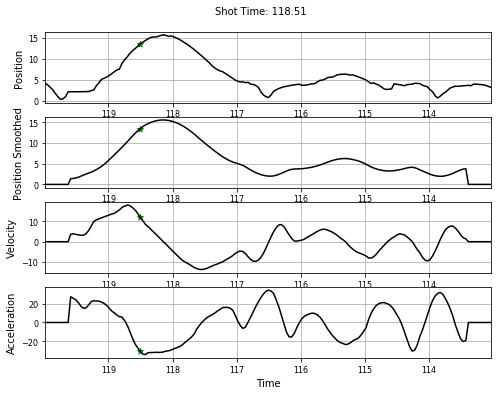

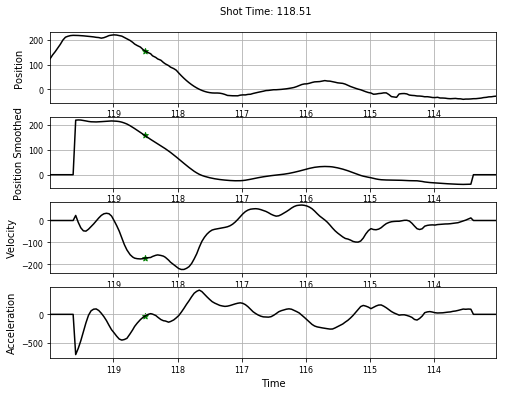

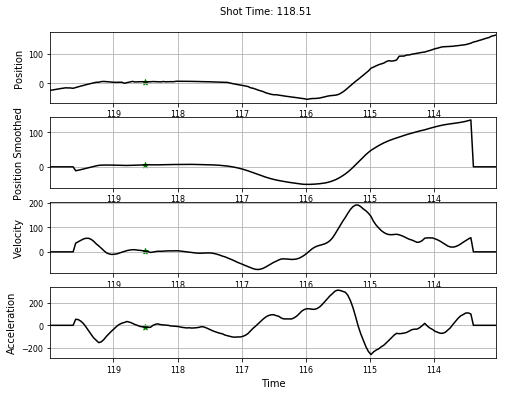

9.03 7 17 [ -0.          -0.          -7.03077083  -6.60508333  -7.32291667
 -10.57883333 -15.19354167 -11.35241714 -17.35833769 -18.42754466
 -12.2961951  -19.58725    -19.95675    -19.95560417 -22.53154167
 -26.46816667  -4.81922917  18.60729167  17.918       16.19258333
  13.14539583  14.55952295  12.15899318   7.82732384   8.00936305
   7.15992502   3.89934873   2.55889583   5.03152083   7.3688125
   4.99941667   2.36252083   0.7394375    1.3303125   -0.31804167
  -2.33479167  -4.36166667  -1.29813885  -4.57349333  -7.47735767
  -0.54455962  -2.76401503  -2.28358867  -6.846125    -9.72495833
  -7.90041667  -7.2191875   -0.          -0.        ]
shot_rho        244.2
shot_angle      92.35
reb_rho         81.77
reb_angle       28.38
reb_height    9.99927
reb_time         8.71
x             -0.8244
y              248.13
Name: 28028, dtype: object


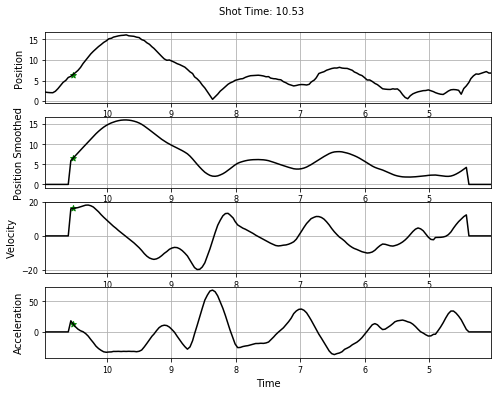

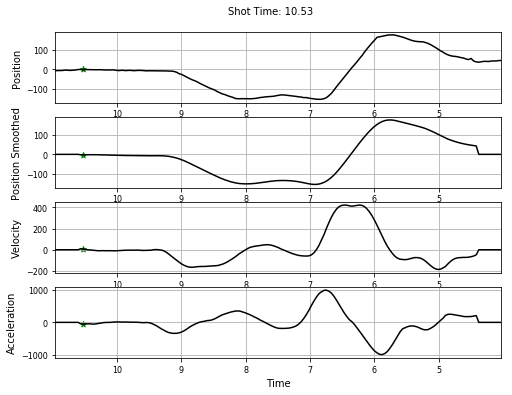

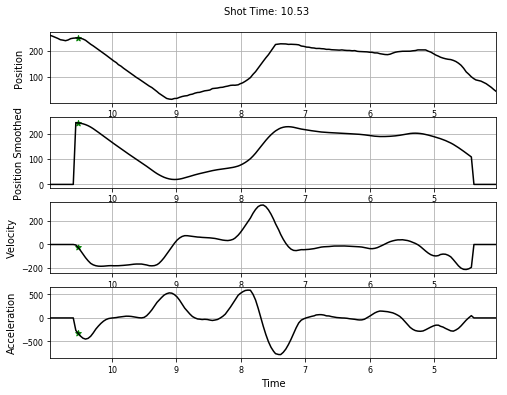

541.53 7 2 [ -0.          -0.           1.06141122  -9.09532524  -7.47303682
  -6.07360417 -23.8793125  -31.05858333 -21.8559375    5.82829167
   2.65883333 -26.67560417 -19.80914583  -6.02060417  -4.26554167
   1.76345833  11.24020833  17.65335417  17.65352083  11.27245833
   0.91383333  -1.34152083   4.70795833   2.64139583  -1.23483333
  -4.33027083  -5.42647917   0.4730625   -1.6959375   -5.894625
  -7.29633333  -7.13522917  -6.73935417  -7.36958333  -4.54645833
  -3.05854167  -1.5978125   -3.55314583 -11.0990625  -14.31702083
 -21.48791667 -25.12791667   3.5144375   22.7201875   16.73997917
  12.74585417   7.4761875   -0.          -0.        ]
233.39 15 22 [ -0.          -0.          -6.12070833  -5.71733333  -8.44727083
 -13.56927083 -10.96389583 -12.125375   -15.03316667  -6.51670833
 -10.49400298  -9.78394069  -3.18061592  -9.03394895 -17.3240625
 -17.68147917 -16.68460417 -17.25704167 -10.26514583  -6.6555625
  -5.96366667  -2.30545833   0.882875     0.22047917  -8.6134375
  -



















  0%|▏                                                                               | 1/588 [00:10<1:41:35, 10.38s/it]

















100%|████████████████████████████████████████████████████████████████████████████████| 588/588 [00:10<00:00, 56.57it/s]

In [79]:
def correct_shots(game_shots, movement, events):

    fixed_shots = pd.DataFrame(columns=game_shots.columns)
    fixed_shots['QUARTER'] = 0

    count = 0
    for ind, shot in game_shots.iterrows():

        if shot['SHOT_DISTANCE'] > 4:
#         try:
            event_id = shot['GAME_EVENT_ID']
            loc_x = shot['LOC_X']
            loc_y = shot['LOC_Y']

            movement_around_shot = movement.loc[movement.event_id.isin([event_id, event_id - 1])]
            movement_around_shot.drop_duplicates(subset=['game_clock','quarter'], inplace=True)
            sec_before, sec_after = 4, 3
            mask = (movement_around_shot['game_clock'] > shot['EVENTTIME']-sec_after) & (
                movement_around_shot['game_clock'] < shot['EVENTTIME']+sec_before)
            movement_around_shot = movement_around_shot[mask]

            game_clock_time = movement_around_shot.loc[movement_around_shot.team_id == -1, 'game_clock'].values
            ball_height = movement_around_shot.loc[movement_around_shot.team_id == -1, 'radius'].values

            ball_x = movement_around_shot.loc[movement_around_shot.team_id == -1, 'x_loc'].values
            ball_y = movement_around_shot.loc[movement_around_shot.team_id == -1, 'y_loc'].values
            
            # find closest distance to nba marked shot location within +/- 1-2 sec of closest by y dimension
            ind_y = np.argmin(np.abs(loc_y-ball_y))
#             print(ind_y, (loc_x, loc_y), ball_x[np.max((0,ind_y-50)):25], ball_y[np.max((0,ind_y-50)):25])
            shot_ind = np.argmin(np.abs(loc_x-ball_x[np.max((0,ind_y-50)):ind_y+25]))
            shot_time = game_clock_time[shot_ind]
            peak_ind = shot_ind + np.argmax(ball_height[shot_ind:(shot_ind+50)])
            rim_gap = np.argmin(np.abs(10 - ball_height[peak_ind:(peak_ind+25)]))
            rim_ind = peak_ind + rim_gap
            peak_reb_gap = np.argmax(ball_height[rim_ind:(rim_ind+50)])
            peak_reb_ind = peak_ind + rim_gap + peak_reb_gap
            shot['reb_height'] = ball_height[peak_reb_ind]
#             print(shot_time, peak_ind-shot_ind, rim_gap, peak_reb_gap, shot['reb_height'])

            # rebound (opportunity) location is 1st coordinates where ball drops below 8 feet
            # or whenever ball's flight is interrupted, not a smooth curve anymore
            ind_gap = next(x[0] for x in enumerate(ball_height[peak_reb_ind:(peak_reb_ind+50)]) if x[1] < 8)

            size = 2
            order = 3
            params = (game_clock_time[(peak_reb_ind+1):(peak_reb_ind+50)], ball_height[(peak_reb_ind+1):(peak_reb_ind+50)], size, order)
            velocity_smoothed = smooth(*params, deriv=1)
#             position_delta = [ball_height[ind+1]-ball_height[ind] for ind in range(peak_reb_ind,(peak_reb_ind+50))]
            ind_gap2 = next(x[0] for x in enumerate(velocity_smoothed) if x[1] > 0)
            reb_ind = (peak_reb_ind+1) + (ind_gap if ind_gap < ind_gap2 else ind_gap2)
            print(game_clock_time[peak_reb_ind], ind_gap, ind_gap2, velocity_smoothed)
            reb_time = game_clock_time[reb_ind]
            reb_rho, reb_angle = cart2pol((ball_x[reb_ind], ball_y[reb_ind]))
            shot['reb_time'] = reb_time
            shot['reb_rho'] = reb_rho
            shot['reb_angle'] = reb_angle

            # doesn't work well given the sometimes noisy data
#             shot_window = acceleration_smoothed[np.max([0, max_ind - 25]): max_ind] 
#             shot_min_ind = np.argmin(shot_window)  
#             shot_ind = max_ind - shot_min_ind
#             shot_time = game_clock_time[shot_ind]

            quarter = movement_around_shot.loc[:, 'quarter'].values[0]
            movement_around_shot = movement_around_shot.loc[movement_around_shot.game_clock == shot_time, :]

            shot['QUARTER'] = quarter
            shot['shot_time'] = shot_time
            shot['x'] = movement_around_shot.loc[movement_around_shot.team_id == -1, 'x_loc'].values[0]
            shot['y'] = movement_around_shot.loc[movement_around_shot.team_id == -1, 'y_loc'].values[0]
   
            # Using NBA provided shot X and Y location instead of calculated coordinates
            rho, phi = cart2pol((shot['LOC_X'], shot['LOC_Y']))
            shot['shot_rho'] = rho
            shot['shot_angle'] = phi

            count += 1
            size = 10
            order = 3
            if count > 7 : return fixed_shots
            if count < 7 :
                print(shot[main_features])
                params = (game_clock_time, ball_height, size, order)
                position_smoothed = smooth(*params, deriv=0)
                velocity_smoothed = smooth(*params, deriv=1)
                acceleration_smoothed = smooth(*params, deriv=2)
                max_ind = np.argmax(position_smoothed)
                plots = [
                    ["Position", ball_height],
                    ["Position Smoothed", position_smoothed],
                    ["Velocity", velocity_smoothed],
                    ["Acceleration", acceleration_smoothed]
                ]
                create_figure(order, shot_time)
                plot(game_clock_time, plots, shot_ind)
            
                for dimension in ball_x, ball_y :
                    params = (game_clock_time, dimension, size, order)
                    position_smoothed = smooth(*params, deriv=0)
                    velocity_smoothed = smooth(*params, deriv=1)
                    acceleration_smoothed = smooth(*params, deriv=2)
                    max_ind = np.argmax(position_smoothed)
                    plots = [
                        ["Position", dimension],
                        ["Position Smoothed", position_smoothed],
                        ["Velocity", velocity_smoothed],
                        ["Acceleration", acceleration_smoothed]
                    ]
                    create_figure(order, shot_time)
                    plot(game_clock_time, plots, shot_ind)

#         except Exception as err:
#             print(err)
#             continue

        fixed_shots = fixed_shots.append(shot)

    return fixed_shots

# Polar Conversions
###########################################
def cart2pol(row):
    x = row[0]
    y = row[1]
    rho = round(np.sqrt(x**2 + y**2)/10, 2)
    # not standard polar, orienting to degrees from axis intersecting both baskets
    radian_to_degrees = 57.2958  # convert to degrees
    phi = radian_to_degrees * (3.1416 - np.arctan2(y, x) )
    phi = round(phi % 360, 2)
    row = (rho,phi)
    return row

def pol2cart(row):
    rho = row[0]
    phi = row[1]
    x = rho * np.cos(3.1416 - phi)
    y = rho * np.sin(3.1416 - phi)
    row = [x,y]
    return row

# if __name__ == '__main__':
if True:
    game_dir = CONFIG.data.movement.converted.dir
    event_dir = CONFIG.data.events.dir

    games = utils.get_games()
    events = utils.get_events(event_dir, games)
    shots = load_shots()
    fixed_shots = pd.DataFrame(columns=features)

    count = 0
    for game in tqdm(games):
        if count < 1 :
            count += 1
            try:
                game_movement = pd.read_csv('%s/%s_converted.csv' % (game_dir, game), compression='gzip')
                game_shots = shots.loc[shots.GAME_ID == game, :]
                game_events = events.loc[events.GAME_ID == game, :]
            except IOError as err:
                print(err)
                continue

            fixed_shots = fixed_shots.append(correct_shots(game_shots, game_movement, game_events))

    fixed_shots.to_csv('%s/%s_fixed.csv' % (CONFIG.data.shots.dir, 'shots'), index=False, compression='gzip')


















  0%|                                                                                          | 0/588 [00:00<?, ?it/s]

595.03 20 2 [-0.06823999999999941, -0.05771000000000015, 0.06386999999999965, -0.08969999999999878, 0.011009999999998854, -0.17898999999999887, -0.19833999999999996, -0.29221000000000075, -0.3448899999999995, -0.36158, -0.64344, -0.28420000000000023, -0.38803000000000054, -0.5338499999999993, -0.10691000000000095, -0.1713799999999992, -0.3466900000000006, -0.37068999999999974, -0.4588599999999996, -0.4127700000000001, -0.5244199999999992, -0.3734100000000007, -0.49641, -0.67699, -0.46455, -0.28117000000000036, -0.3873199999999999, -0.5091299999999999, -0.3364600000000002, 0.034050000000000136, -0.3374100000000002, -0.33596000000000004, -1.3985999999999998, -0.3747400000000001, -0.029749999999999943, 0.051020000000000065, 0.10876999999999981, 0.5472999999999999, 0.6112500000000001, -0.044079999999999675, 0.06712000000000007, 0.07450000000000001, 0.0512999999999999, -0.08106999999999998, 0.1302399999999997, -0.41259999999999986, 0.6400700000000001, 0.06781999999999977, -0.009709999999999

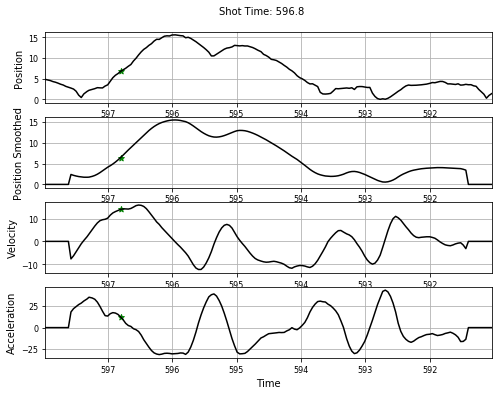

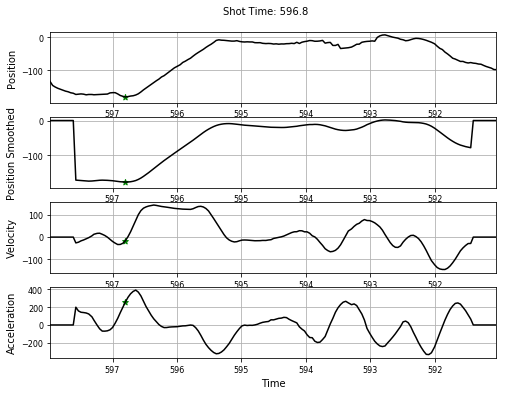

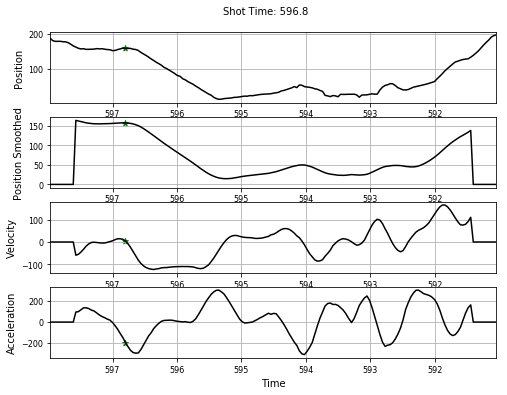

260.24 14 5 [-0.12815999999999939, -0.22744999999999926, -0.3177000000000003, -0.17830000000000013, -0.42405000000000115, 0.1056000000000008, -0.5992200000000008, 0.5884600000000013, -0.30388000000000126, 0.36167000000000016, -0.3864199999999993, 0.1216399999999993, -0.28235999999999883, -1.847220000000001, -0.09523999999999955, -0.19689000000000156, -0.29597999999999836, -0.42429000000000183, -0.2662699999999987, 0.0114800000000006, 0.08032999999999824, -1.4345400000000001, -2.080259999999998, -1.06543, 0.20516999999999985, -0.1523699999999999, -0.32208000000000014, -0.5178799999999999, 0.026289999999999925, 0.26370000000000005, -0.3461399999999999, 0.12264999999999993, 0.0960700000000001, -0.07220000000000004, -0.07220000000000004, 0.04520999999999997, 0.1460999999999999, 0.7075600000000002, -0.56226, 0.2674400000000001, 0.5470299999999997, 0.012450000000000294, -0.01797000000000004, -0.07894000000000023, -0.1417600000000001, -0.14557999999999982, -0.13230000000000008, 1.45503, -0.76

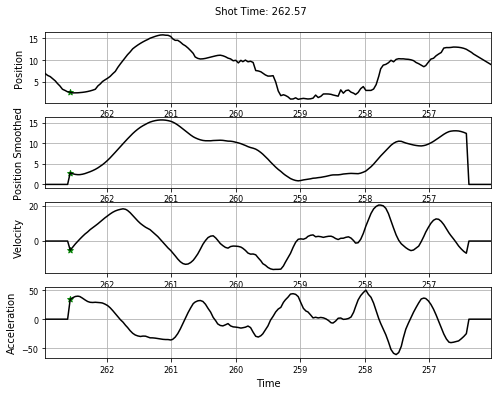

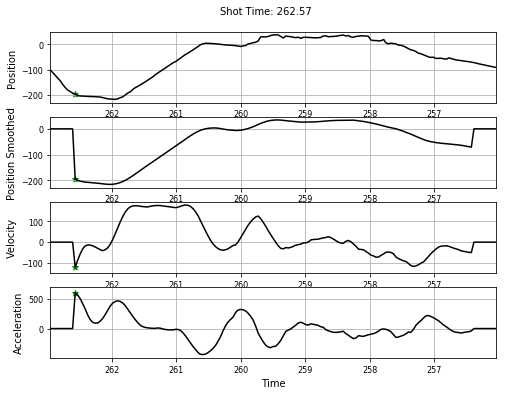

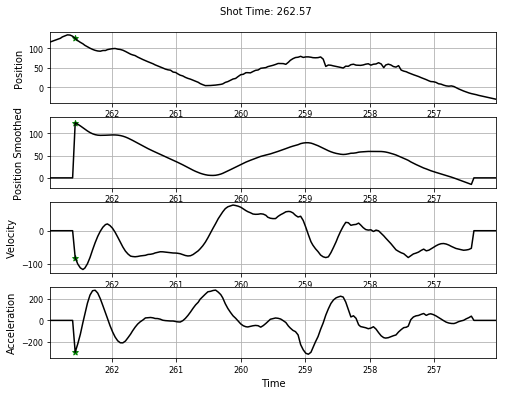

213.44 9 19 [-0.6451799999999999, -0.6215200000000003, -0.19852000000000025, -0.16023999999999994, -0.1229300000000002, -0.08660999999999852, -0.05125000000000135, -0.016869999999999052, -0.9809300000000007, -0.9809299999999999, -0.9809400000000004, -1.4139400000000002, -1.0625499999999994, -0.7613500000000002, -0.5103600000000001, -0.30955999999999984, -0.15897000000000006, -0.058559999999999945, -0.008369999999999989, 0.7715700000000001, 0.6164899999999998, 0.46394, 0.30717000000000017, 0.5168300000000001, 0.43915000000000015, 0.37545999999999946, 0.17736000000000018, 0.15258000000000038, 0.12446999999999964, 0.0930200000000001, 0.058259999999999756, 0.020159999999999734, -0.10898999999999948, -0.026900000000000368, -0.002169999999999561, -0.2137500000000001, -0.40008, -0.0907600000000004, -0.27877999999999936, -0.5069900000000005, -0.20095999999999936, -0.18103000000000025, -0.16125000000000034, -0.14164999999999983, -0.12220999999999993, -0.10294000000000025, -0.08384999999999998, 

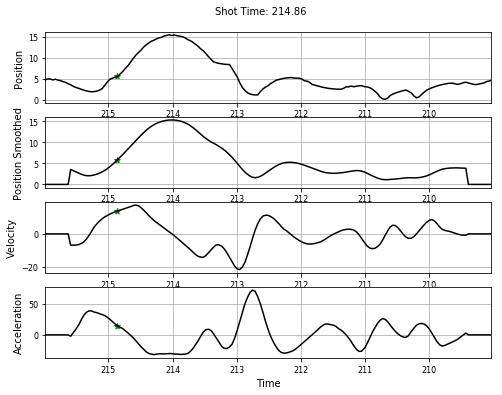

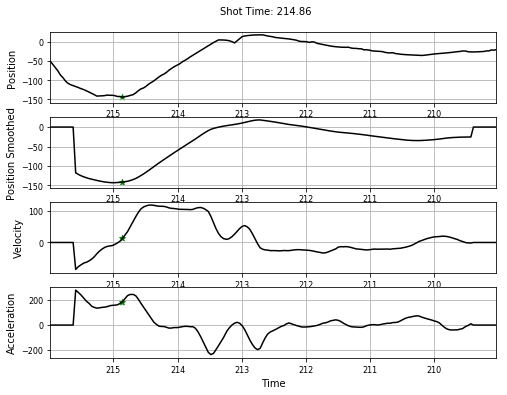

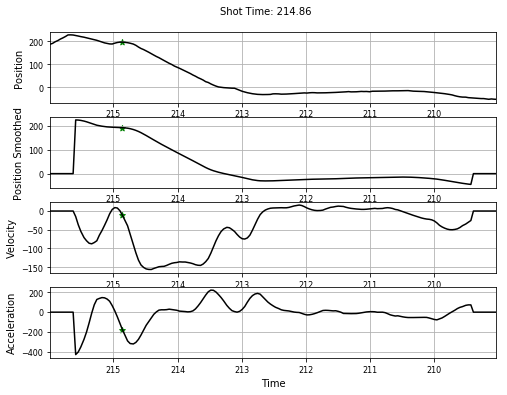

145.32 31 5 [-0.8269900000000003, -0.16440000000000055, -0.38594999999999935, -0.3504699999999996, -0.7600999999999996, 0.0854499999999998, 0.1582499999999989, 0.16269000000000133, -0.12040000000000006, 0.1690100000000001, 0.010409999999998476, -0.03663999999999845, -0.16513000000000133, -0.2465799999999998, -0.25710999999999906, -0.2920400000000001, -0.5237500000000033, -0.26811999999999614, 0.11352999999999902, 0.2127099999999995, 0.12005000000000088, 0.005860000000000198, 0.01311999999999891, 0.02876000000000012, 0.14479000000000042, -0.37350999999999956, -0.15187000000000062, -0.039039999999999964, -0.021950000000000358, -0.5044500000000003, -0.3748799999999992, -0.24939, -0.5446499999999999, -0.35706999999999933, -0.6656100000000009, -0.5379399999999999, -0.7074100000000003, -0.5929199999999994, -0.6185800000000001, -0.8127599999999999, -0.7525700000000002, -0.93591, -0.6443500000000001, 0.51989, 0.8194400000000003, 0.4449599999999996, 0.5081400000000005, 0.6517199999999996, 0.435

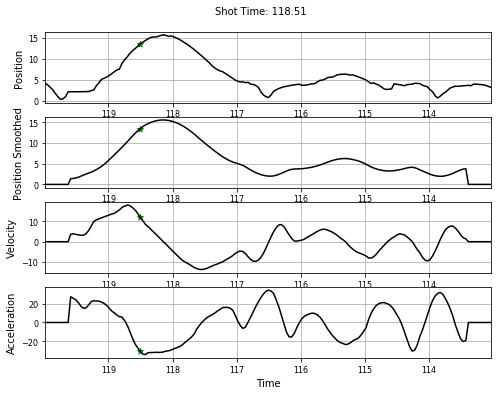

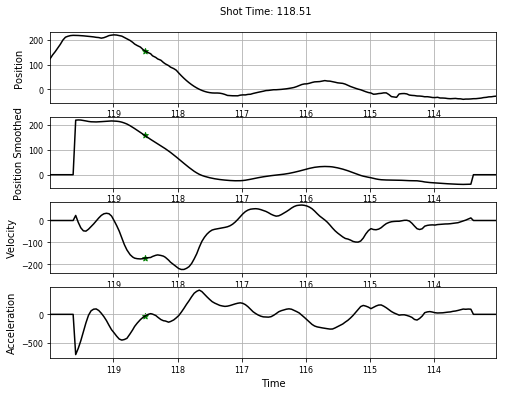

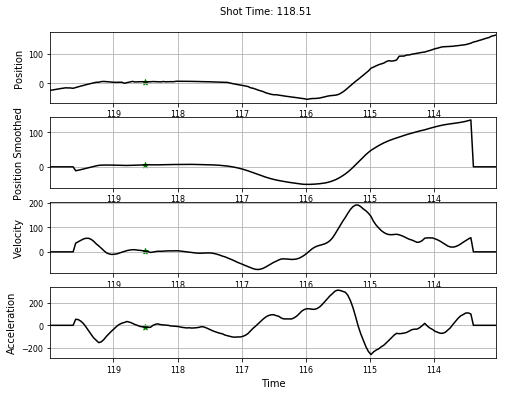

9.03 7 17 [-0.27875999999999834, -0.2805300000000006, -0.33604000000000056, -0.23086999999999946, -0.31306999999999974, -0.3010999999999999, -0.5533200000000003, -0.5900300000000005, -0.40944999999999965, -0.7943699999999998, -0.4804000000000004, -0.6385300000000003, -0.8751999999999995, -0.7138300000000002, -0.90544, -0.881, -0.97611, 0.61039, 0.63419, 0.7566700000000002, 0.5249899999999998, 0.5649899999999999, 0.5634000000000006, 0.2952300000000001, 0.35489999999999977, 0.30398999999999976, 0.17466999999999988, 0.1611400000000005, 0.08439999999999959, 0.3158399999999997, 0.2254100000000019, 0.16731999999999836, 0.03354999999999997, 0.04666999999999977, 0.03929000000000027, -0.07038000000000011, -0.11163999999999952, -0.19273000000000007, 0.03338999999999981, -0.3520599999999998, -0.15739000000000036, -0.019230000000000302, -0.16852, -0.0726899999999997, -0.4594100000000001, -0.27003999999999984, -0.3654799999999998, -0.19703000000000026, -0.20231999999999895, 0.11119999999999886]
sho

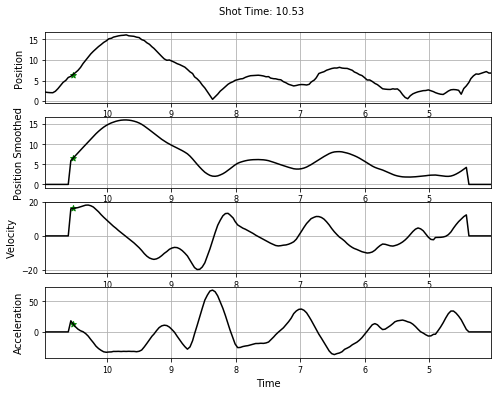

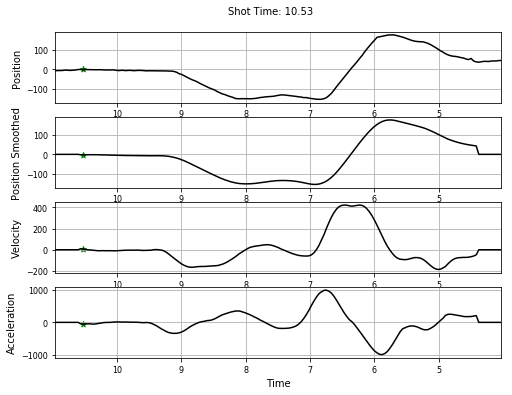

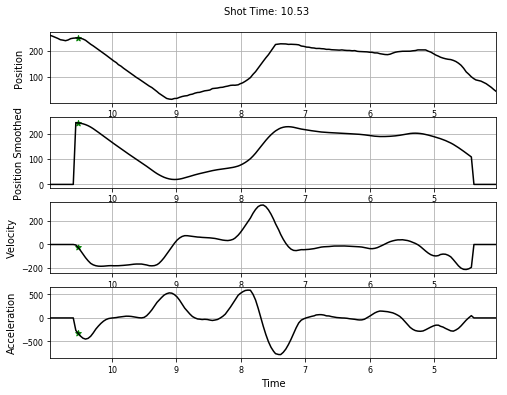

541.53 7 2 [-0.7340800000000005, -0.3485800000000001, 0.04921000000000042, -0.14130999999999716, -0.5525800000000025, -0.04100000000000037, -0.6228000000000007, -1.1786899999999996, -1.10736, -0.4714299999999998, 0.6180099999999982, -0.664159999999999, -1.1278599999999996, -0.3578599999999996, -0.22748999999999997, -0.07970000000000033, 0.25499000000000027, 0.6080599999999996, 0.7257500000000006, 0.6080699999999997, 0.25499000000000027, -0.09511000000000003, 0.0724499999999999, 0.23031999999999986, -0.04532000000000025, -0.04532000000000025, -0.2720799999999999, -0.09794999999999998, 0.059820000000000206, -0.22189999999999976, -0.22256000000000054, -0.3416199999999998, -0.22512000000000132, -0.31970999999999883, -0.23729999999999984, -0.13654999999999973, -0.11494000000000026, -0.05502999999999947, -0.2862900000000006, -0.5687899999999999, -0.6029799999999996, -1.0439300000000002, -0.6453800000000001, 0.83921, 0.7138100000000001, 0.61083, 0.3980800000000002, 0.2305499999999996, 0.20101

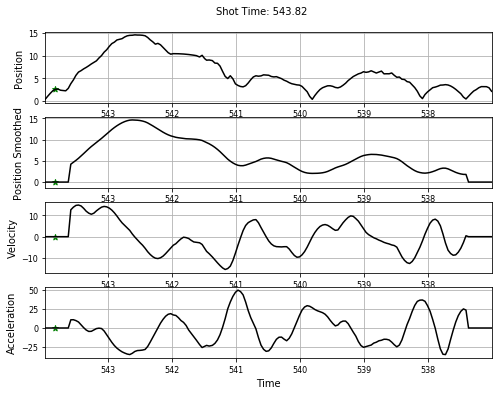

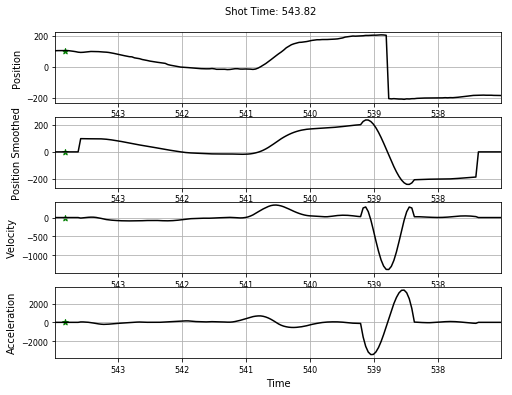

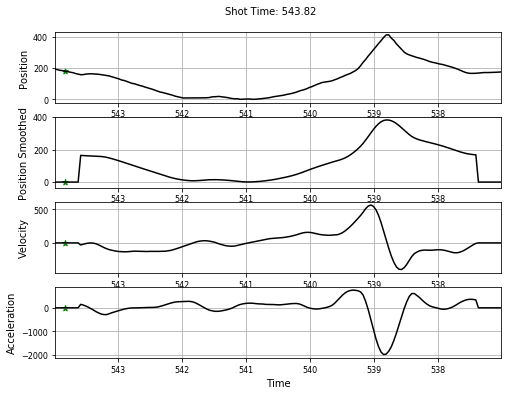

233.39 15 23 [-0.17172000000000054, -0.25954999999999906, -0.2785000000000011, -0.21748999999999974, -0.27444000000000024, -0.4206899999999987, -0.5937300000000008, -0.31325000000000003, -0.6654999999999998, -0.43734000000000073, -0.19070999999999927, -0.6028299999999991, -0.22313000000000116, -0.21844999999999892, -0.5412699999999999, -0.7671100000000006, -0.6246600000000004, -0.7140099999999983, -0.5949700000000018, -0.2548199999999996, -0.3072499999999998, -0.14484999999999992, -0.04732000000000003, 0.06867999999999963, -0.12941000000000003, -0.48362000000000016, -0.22543999999999986, -0.46138999999999974, -0.6019200000000002, -0.78891, -1.10282, 0.7200599999999999, 0.5697299999999998, 0.6186400000000003, 0.5326, 0.3603700000000001, 0.1930900000000002, 0.36660999999999966, 0.22851, 0.10055000000000014, -0.06344000000000038, 0.15899000000000063, -0.1764300000000003, -0.11070000000000002, -0.4399899999999999, -0.39975000000000005, -0.74356, -0.6871300000000002, -0.696, -0.20226]



















  0%|▏                                                                               | 1/588 [00:10<1:38:03, 10.02s/it]
















100%|████████████████████████████████████████████████████████████████████████████████| 588/588 [00:10<00:00, 58.64it/s]

In [71]:
# Previous test

In [ ]:
# Testing
test = np.array([-16.6984, -17.1793, -16.875,  -16.2446, -16.1919, -17.0749, -17.0792, -14.9426])
print(test[0:5])
np.max((0,5))